In [1]:
import pyuvdata
import numpy as np
import sys
sys.path.append("/Users/ruby/Astro/rlb_LWA/beam_manipulation")
import jones_to_mueller
import importlib
importlib.reload(jones_to_mueller)
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#beam_path = "/Users/ruby/Astro/Nivedita_beams/LWA_10to100.beamfits"
beam_path = "/Users/ruby/Astro/Nivedita_beams/LWA_10to100_MROsoil_efields.fits"
beam = pyuvdata.UVBeam()
beam.read(beam_path)
beam.select(axis2_inds=np.where(beam.axis2_array <= np.pi/2)[0])
beam.peak_normalize()

In [3]:
# Beam manipulations
beam_radec = jones_to_mueller.pol_basis_transform_azza_to_radec(beam, latitude=37.23, inplace=False)
mueller_coherency = jones_to_mueller.convert_jones_to_mueller(beam_radec)
mueller_stokes = jones_to_mueller.pol_basis_transform_radec_to_stokes(mueller_coherency, inplace=False)
mueller_pstokes = jones_to_mueller.pol_basis_transform_instrumental_to_pseudostokes(mueller_stokes)

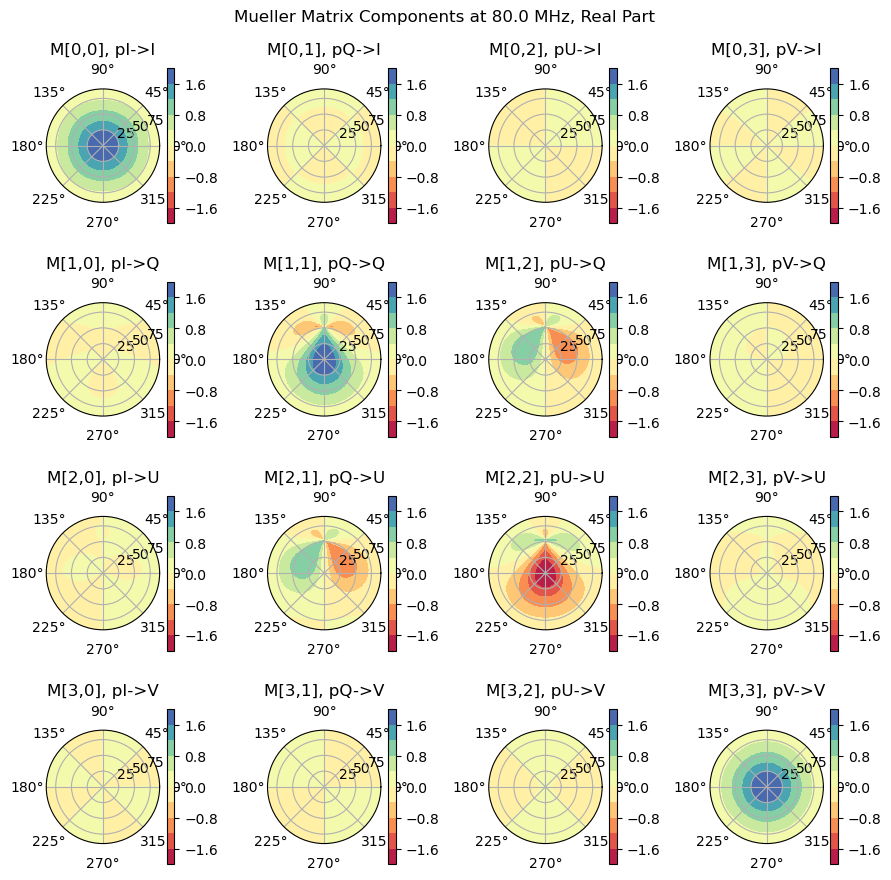

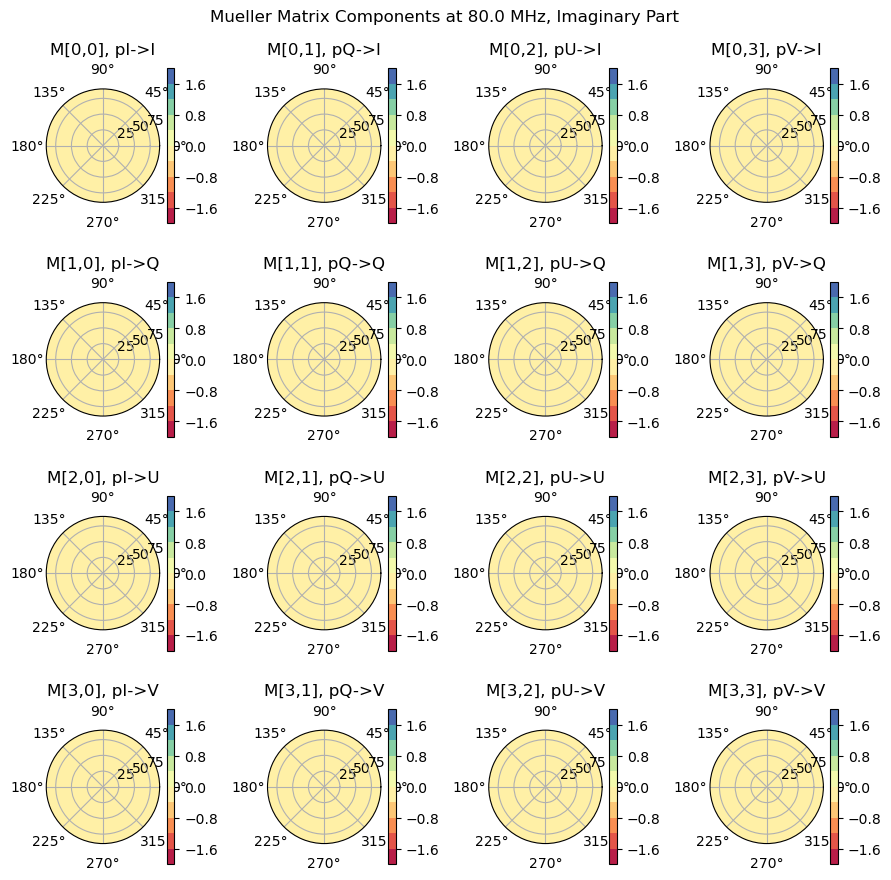

In [4]:
jones_to_mueller.plot_mueller_matrix(
    mueller_pstokes,  # pyuvdata beam object
    np.degrees(beam_radec.axis1_array),
    np.degrees(beam_radec.axis2_array),
    beam_radec.freq_array,
    plot_freq=80.0e6,  # frequency in Hz, must be included in the beam obj
    real_part=True,
    contour_plot=True,
    stokes=True,
    pseudostokes=True,
    vmin=-2,
    vmax=2,
)
jones_to_mueller.plot_mueller_matrix(
    mueller_pstokes,  # pyuvdata beam object
    np.degrees(beam_radec.axis1_array),
    np.degrees(beam_radec.axis2_array),
    beam_radec.freq_array,
    plot_freq=80.0e6,  # frequency in Hz, must be included in the beam obj
    real_part=False,
    contour_plot=True,
    stokes=True,
    pseudostokes=True,
    vmin=-2,
    vmax=2,
)

In [5]:
np.shape(mueller_pstokes)

(4, 1, 4, 91, 91, 361)